# Digit Recognizer

### Data Description

* The data files train.csv file contain gray-scale images of hand-drawn digits, from zero through nine.
* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
* Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. 
* This pixel-value is an integer between 0 and 255, inclusive.

* The training data set, (train.csv), has 785 columns. 
* The first column, called "label", is the digit that was drawn by the user. 
* The rest of the columns contain the pixel-values of the associated image.

* Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. 
* To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. 
* Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In the above code of line , we have imported all the necessary librabies

In [2]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In the above line of code, we have Imported our Dataset and stored in a variable called 'data'

In [3]:
data.shape

(42000, 785)

* Got the sahpe of our Dataset.
* There are 42000 Rows & 785 Columns

In [4]:
col_names = data.columns

col_names

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

### Lets find the Unique values in our Target variable

In [7]:
print(data.label.unique())

[1 0 4 7 3 5 8 9 2 6]


Text(0.5, 1.0, 'Count of label')

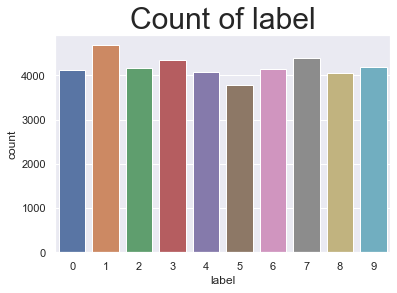

In [8]:
sns.countplot(x='label', data=data)
plt.title('Count of label', fontsize=30)

* CountPlot of Target Variable i.e Label

In [9]:
data.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

### Now Lets do Training & Testing of our Dataset

In [11]:
X = data.drop('label', axis=1)   

y = data['label']        # Target Variable

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state= 355)

### Now Lets first try with Decision Tree classifier

In [13]:
attr_forest = DecisionTreeClassifier( min_samples_split= 2)

attr_forest.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(attr_forest.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(attr_forest.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.8494


* Using Decision Tree classifier we got 100 % Training Accuracy & 84 % Testing Accuracy .
* But from this info. we can say that our Model with Decision Tree classifier is OverFitted.

### Random Forest without HyperParameter Tunning

In [15]:
classifier = RandomForestClassifier(random_state=6)

In [16]:
classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=6)

In [17]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(classifier.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9624


* Using Random Forest classifier we got 100 % Training Accuracy & 96 % Testing Accuracy .
* Now we can see by changing an Algorithm we have improved a Testing Accuracy.

### Random Forest with HyperParameter Tunning

In [18]:
n_estimators = [5,20,50,100,90,115,130] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = range(2,20,1) # maximum number of levels allowed in each decision tree
min_samples_split = range(2,10,1)  # minimum sample number to split a node
min_samples_leaf = range(1,10,1) # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [20]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [21]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(2, 20),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [5, 20, 50, 100, 90,
                                                         115, 130]},
                   random_state=35, verbose=2)

In [22]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100, 90, 115, 130], 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 10), 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 17, 'bootstrap': False}  



In [23]:
rand_clf = RandomForestClassifier(criterion= 'gini',
 max_depth = 17,
 max_features = 'auto',
 min_samples_leaf = 4,
 min_samples_split= 7,
 n_estimators = 100,random_state=6)

In [24]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=17, min_samples_leaf=4, min_samples_split=7,
                       random_state=6)

In [25]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rand_clf.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(rand_clf.score(x_test, y_test)))

Training set score: 0.9931
Test set score: 0.9560


* Now from This Score we got 99 % Training Accuracy & 95 % Testing Accuracy with HyperParameter Tunning.

In [26]:
y_pred = rand_clf.predict(x_test)

In [27]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1215,    0,    1,    1,    1,    0,    9,    1,    9,    1],
       [   0, 1390,    9,    1,    5,    2,    3,    2,    3,    2],
       [   5,    3, 1204,    6,    9,    0,    2,    7,   11,    0],
       [   4,    3,   28, 1246,    2,   27,    4,   19,   22,    7],
       [   1,    1,    2,    0, 1168,    0,    7,    1,    4,   30],
       [  11,    2,    0,   19,    0, 1057,    8,    0,   12,    3],
       [   6,    3,    1,    0,    3,   14, 1203,    0,    5,    0],
       [   3,    8,   15,    2,    7,    1,    0, 1301,    4,   17],
       [   1,   10,   13,    6,    5,    8,   10,    1, 1140,   13],
       [   4,    4,    3,   21,   18,    5,    1,   13,   20, 1121]],
      dtype=int64)

In [28]:
from sklearn.metrics import classification_report 


In [39]:

from sklearn.model_selection import cross_val_predict, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier 

  
def print_score(rand_clf, x_train, y_train, x_test, y_test, train = True): 
    if train: 
        print("Train Result:") 
        print("------------") 
        print("Classification Report: \n {}\n".format(classification_report( 
                y_train, rand_clf.predict(x_train)))) 
        print("Confusion Matrix: \n {}\n".format(confusion_matrix( 
                y_train, rand_clf.predict(x_train)))) 
  
        res = cross_val_score(rand_clf, x_train, y_train,  
                              cv = 10, scoring ='accuracy') 
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res))) 
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res))) 
        print("accuracy score: {0:.4f}\n".format(accuracy_score( 
                y_train, rand_clf.predict(x_train)))) 
        print("----------------------------------------------------------") 
                 
    elif train == False: 
        print("Test Result:") 
        print("-----------") 
        print("Classification Report: \n {}\n".format( 
                classification_report(y_test, rand_clf.predict(x_test)))) 
        print("Confusion Matrix: \n {}\n".format( 
                confusion_matrix(y_test, rand_clf.predict(x_test))))  
        print("accuracy score: {0:.4f}\n".format( 
                accuracy_score(y_test, rand_clf.predict(x_test)))) 
        print("-----------------------------------------------------------") 
          
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(x_train, y_train) 
print_score(knn, x_train, y_train, x_test, y_test, train = True) 
print_score(knn, x_train, y_train, x_test, y_test, train = False) 


Train Result:
------------


C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2894
           1       0.95      1.00      0.97      3267
           2       0.99      0.96      0.97      2930
           3       0.97      0.97      0.97      2989
           4       0.99      0.97      0.98      2858
           5       0.97      0.97      0.97      2683
           6       0.98      0.99      0.98      2902
           7       0.96      0.97      0.97      3043
           8       0.99      0.94      0.97      2856
           9       0.95      0.97      0.96      2978

    accuracy                           0.97     29400
   macro avg       0.97      0.97      0.97     29400
weighted avg       0.97      0.97      0.97     29400




C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix: 
 [[2877    2    2    0    0    5    8    0    0    0]
 [   0 3254    4    0    0    0    1    6    1    1]
 [  18   36 2811    5    2    0    2   48    5    3]
 [   5    5   14 2908    0   21    2   12    9   13]
 [   2   27    0    0 2765    0   10    3    0   51]
 [   3    5    1   23    2 2595   30    3    4   17]
 [   8    3    1    0    3   11 2876    0    0    0]
 [   0   39    7    0    7    0    0 2956    0   34]
 [   9   35    3   35    8   34   11    3 2694   24]
 [   9    6    4   14   19    5    0   34    7 2880]]



C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\meabh\anaco

Average Accuracy: 	 0.9622
Accuracy SD: 		 0.0028


C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


accuracy score: 0.9733

----------------------------------------------------------
Test Result:
-----------


C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1238
           1       0.94      0.99      0.96      1417
           2       0.98      0.94      0.96      1247
           3       0.95      0.95      0.95      1362
           4       0.98      0.95      0.97      1214
           5       0.95      0.97      0.96      1112
           6       0.97      0.98      0.98      1235
           7       0.95      0.97      0.96      1358
           8       0.99      0.92      0.95      1207
           9       0.95      0.95      0.95      1210

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600




C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix: 
 [[1231    0    0    0    0    0    5    2    0    0]
 [   0 1408    2    2    1    0    1    1    0    2]
 [  11   24 1178    2    2    2    2   25    1    0]
 [   2    6    9 1297    0   17    3   16    6    6]
 [   0   21    0    0 1159    0    4    2    0   28]
 [   4    1    0   15    1 1078   10    0    1    2]
 [  10    3    0    0    0    8 1213    0    1    0]
 [   2   18    3    0    6    0    0 1316    0   13]
 [   2   18    7   29    6   21    6    4 1107    7]
 [   5    5    1   15   10    3    2   21    3 1145]]



C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


accuracy score: 0.9629

-----------------------------------------------------------


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1238
           1       0.98      0.98      0.98      1417
           2       0.94      0.97      0.95      1247
           3       0.96      0.91      0.94      1362
           4       0.96      0.96      0.96      1214
           5       0.95      0.95      0.95      1112
           6       0.96      0.97      0.97      1235
           7       0.97      0.96      0.96      1358
           8       0.93      0.94      0.94      1207
           9       0.94      0.93      0.93      1210

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [41]:
import pickle as pk     # to save the model

In [42]:
filename = "digit_classifier.pk"

pk.dump(rand_clf,open(filename,"wb"))     # wb = write binaries